### About Dataset: Which American astronaut has spent the most time in space?

In [7]:
import pandas as pd

df_astro=pd.read_csv("../Data/NASA Astronauts, 1959-Present/astronauts.csv")

In [9]:
df_astro.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [10]:
# No of rows/indexes and cols in the df_astro
df_astro.shape

(357, 19)

In [21]:
# distinct count of astronauts
len(df_astro['Name'].unique().tolist()) # df_astro accessed for Name, then got unique, converted into list and used len function

357

In [28]:
# how many male/female astronauts
gender_diversity=df_astro.groupby('Gender').count()
#gender_diversity['Name'] or gender_diversity=df_astro.groupby('Gender')['Name'].count()
gender_diversity['Name']

Gender
Female     50
Male      307
Name: Name, dtype: int64

In [29]:
gender_diversity

,Name,Year,Group,Status,Birth Date,Birth Place,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
Gender,,,,,,,,,,,,,,,,,,
Female,50,48,48,50,50,50,50,50,44,13,13,50,50,50,50,46,7,4
Male,307,282,282,307,307,307,306,285,254,194,198,307,307,307,307,288,45,12


In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt

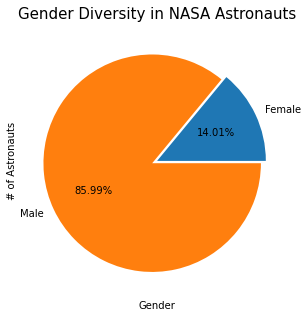

In [244]:
# plot a pie chart of the gender diversity of name
gender_diversity['Name'].plot(kind='pie', figsize=(5,5), autopct='%1.2f%%', explode=(0, 0.05))

plt.title('Gender Diversity in NASA Astronauts', size=15)
plt.xlabel('Gender')
plt.ylabel('# of Astronauts')

plt.show()

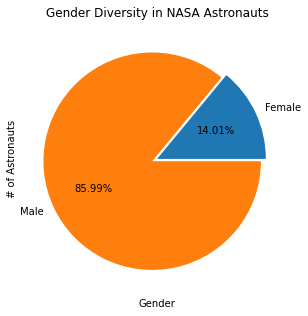

In [88]:
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(data=gender_diversity, x=gender_diversity['Name'], labels=gender_diversity.index, autopct='%1.2f%%', explode=(0, 0.05))

ax1.set_title('Gender Diversity in NASA Astronauts')
ax1.set_xlabel('Gender')
ax1.set_ylabel('# of Astronauts')

plt.show()

In [89]:
gender_diversity.index

Index(['Female', 'Male'], dtype='object', name='Gender')

### What Astronauts study in Undergraduate?

In [177]:
undergraduate=df_astro.groupby('Undergraduate Major')['Name'].count()
undergraduate.head()

Undergraduate Major
Accounting                                                              1
Aeronautical & Astronautical Engineering                                6
Aeronautical Engineering                                               28
Aeronautics & Astronautics                                              3
Aeronautics & Astronautics; Earth, Atmospheric & Planetary Sciences     1
Name: Name, dtype: int64

In [178]:
undergraduate=pd.DataFrame(undergraduate)
undergraduate

,Name
Undergraduate Major,
Accounting,1
Aeronautical & Astronautical Engineering,6
Aeronautical Engineering,28
Aeronautics & Astronautics,3
"Aeronautics & Astronautics; Earth, Atmospheric & Planetary Sciences",1
...,...
Psychology,1
Solid Earth Sciences,1
Space Physics,1


In [179]:
undergraduate.rename(columns={'Name':'# of astronaunts'}, inplace=True)
undergraduate.sort_values(by='# of astronaunts', ascending=False, inplace=True)
undergraduate

,# of astronaunts
Undergraduate Major,
Physics,35
Aerospace Engineering,33
Mechanical Engineering,30
Aeronautical Engineering,28
Electrical Engineering,23
...,...
Marine Engineering & Nautical Science,1
Mathematical & Electrical Science,1
Biochemistry,1


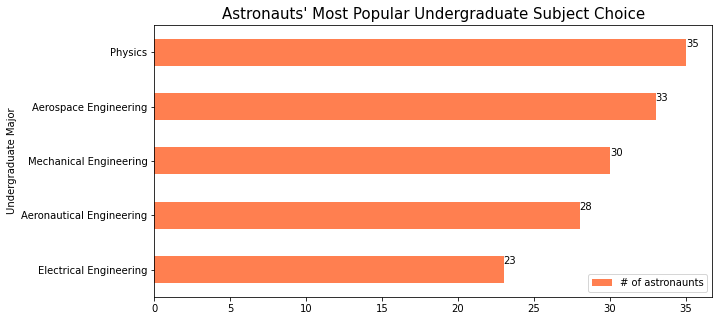

In [238]:
undergraduate.head().plot(kind='barh', figsize=(10,5), color='coral').invert_yaxis() #invert_yaxis() to display upside down    

for index, value in enumerate(undergraduate.head().values): 
    plt.annotate(int(value), xy=(value, index-0.10))

plt.title("Astronauts' Most Popular Undergraduate Subject Choice", size=15)
plt.show()

### What Astronauts study in Graduate Major?

In [230]:
graduate=pd.DataFrame(df_astro.groupby('Graduate Major')['Name'].count())
graduate.head()

,Name
Graduate Major,
Aeronautical & Astronautical Engineering,3
Aeronautical Engineering,27
Aeronautical Engineering Systems,1
Aeronautical Engineering; Aeronautics & Astronautics,2
Aeronautical Engineering; National Security & Strategic Studies,1


In [232]:
graduate.rename(columns={'Name':'# of astronaunts'}, inplace=True)
graduate.sort_values(by='# of astronaunts', ascending=False, inplace=True)
graduate.head()

,# of astronaunts
Graduate Major,
Aeronautical Engineering,27
Aerospace Engineering,21
Medicine,16
Physics,15
Mechanical Engineering,13


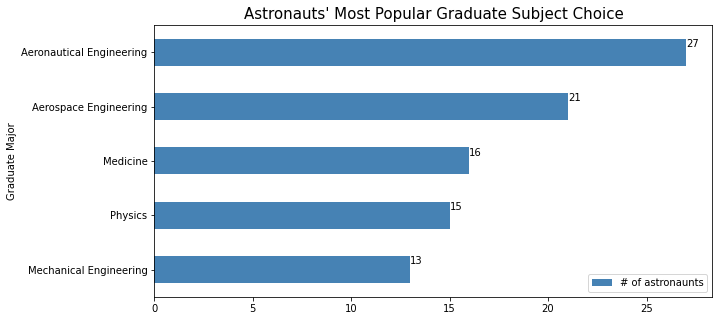

In [241]:
graduate.head().plot(kind='barh', figsize=(10,5), color='steelblue').invert_yaxis() 
#invert_yaxis() to display upside down    

for index, value in enumerate(graduate.head().values): 
    plt.annotate(int(value), xy=(value, index-0.10))

plt.title("Astronauts' Most Popular Graduate Subject Choice", size=15)
plt.show()

## Which astronaut has spend most time in space?

In [247]:
astro_time=pd.DataFrame(df_astro.groupby('Name')['Space Walks (hr)'].sum())
astro_time.head()

,Space Walks (hr)
Name,
Alan B. Shepard Jr.,9.0
Alan G. Poindexter,0.0
Alan L. Bean,10.0
Albert Sacco Jr.,0.0
Alfred M. Worden,0.5


In [249]:
# sorting dataframe
astro_time.sort_values(by='Space Walks (hr)', ascending=False, inplace=True)
astro_time.head()

,Space Walks (hr)
Name,
Michael E. Lopez-Alegria,67.0
John M. Grunsfeld,58.0
Jerry L. Ross,58.0
Richard A. Mastracchio,53.0
Sunita L. Williams,50.0


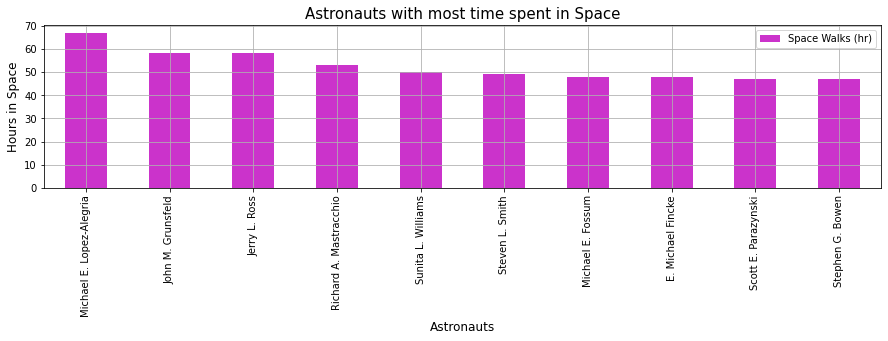

In [287]:
astro_time.head(10).plot(kind='bar', figsize=(15,3), color='m', alpha=0.8, grid=True)

plt.title('Astronauts with most time spent in Space', size=15)
plt.xlabel('Astronauts', size=12)
plt.ylabel('Hours in Space', size=12)

plt.show()

## Plot a scatter plot of space walk for all astronauts

In [303]:
df_space_walk_total=df_astro.groupby(by='Year')['Space Walks (hr)'].sum()
df_space_walk_total

Year
1959.0      9.0
1962.0     34.5
1963.0     63.5
1965.0     54.0
1966.0    105.5
1967.0     38.0
1969.0      4.0
1978.0     87.0
1980.0    104.0
1984.0     58.0
1985.0     70.0
1987.0    104.0
1990.0    235.0
1992.0    389.0
1995.0    121.0
1996.0    466.0
1998.0    363.0
2000.0    263.0
2004.0    129.0
2009.0     54.0
Name: Space Walks (hr), dtype: float64

In [304]:
df_space_walk_total=pd.DataFrame(df_space_walk_total)

In [305]:
df_space_walk_total

,Space Walks (hr)
Year,
1959.0,9.0
1962.0,34.5
1963.0,63.5
1965.0,54.0
1966.0,105.5
1967.0,38.0
1969.0,4.0
1978.0,87.0
1980.0,104.0


In [306]:
df_space_walk_total.reset_index(inplace=True)

In [307]:
df_space_walk_total

,Year,Space Walks (hr)
0,1959.0,9.0
1,1962.0,34.5
2,1963.0,63.5
3,1965.0,54.0
4,1966.0,105.5
5,1967.0,38.0
6,1969.0,4.0
7,1978.0,87.0
8,1980.0,104.0
9,1984.0,58.0


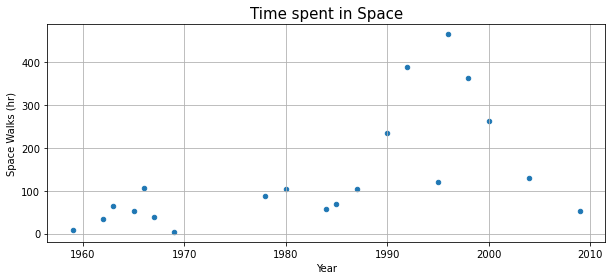

In [314]:
df_space_walk_total.plot(kind='scatter', x='Year', y='Space Walks (hr)', figsize=(10,4), grid=True)

plt.title('Time spent in Space', size=15)
plt.show()

## Box plot of time spent in space ignoring 0 values

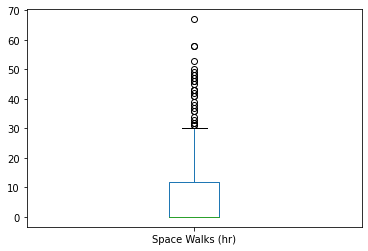

In [316]:
astro_time.plot(kind='box')

plt.show()

In [318]:
astro_time.describe()

,Space Walks (hr)
count,357.000000
mean,7.707283
std,13.367973
min,0.000000
25%,0.000000
50%,0.000000
75%,12.000000
max,67.000000


In [319]:
# Ignoring zero values now
astro_time=astro_time[astro_time['Space Walks (hr)']!=0]
astro_time

,Space Walks (hr)
Name,
Michael E. Lopez-Alegria,67.0
John M. Grunsfeld,58.0
Jerry L. Ross,58.0
Richard A. Mastracchio,53.0
Sunita L. Williams,50.0
...,...
Thomas K. Mattingly II,1.0
Michael Collins,1.0
Richard F. Gordon Jr.,0.5


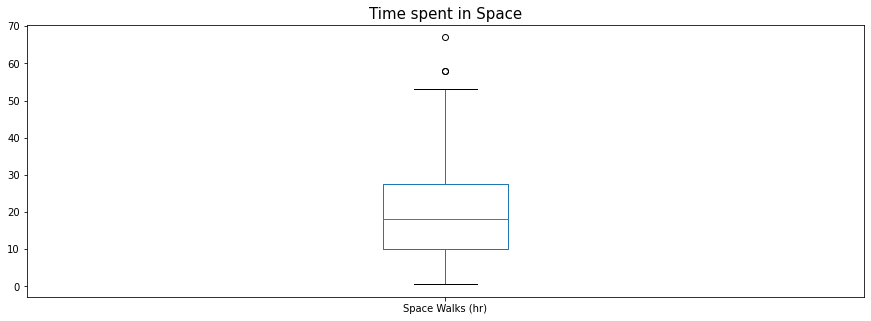

In [331]:
astro_time.plot(kind='box', figsize=(15,5))

plt.title('Time spent in Space', size=15)
plt.show()

In [332]:
astro_time.describe()

,Space Walks (hr)
count,135.000000
mean,20.381481
std,14.646354
min,0.500000
25%,10.000000
50%,18.000000
75%,27.500000
max,67.000000
